**Notes**:
* Feel free to add cells as you need them.
* Keep your code clean and readable.
* Comments included in this document are just to summarize the question. For full details make sure you read the assignment pdf thoroughly.
* Don't forget to rename the file when you finish

# EECS 461/ECE 523  | Assignment 2

In [1]:
from __future__ import division, print_function, unicode_literals

# Common imports
import pandas as pd
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.simplefilter('ignore')

## DATA PREPARATION & VISUALIZATION 

In [2]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [3]:
train = pd.read_csv("train.csv") #reading train.csv
test = pd.read_csv("test.csv") #reading test.csv

### a)  Split your data into X and y:

In [4]:
train_x_a = train.drop(columns='label') #containing all the input features of train set
train_y = train[['label']] #containing the target label only of train set
test_x = test.drop(columns='label') #containing all the input features of test set
test_y = test[['label']]  #containing the target label only of test set

### b)  Visualizing the data:

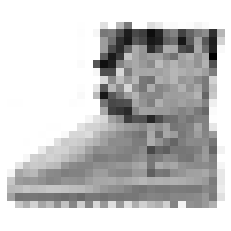

In [5]:
def plot_image(row): 
    image = row.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,interpolation="nearest")
    plt.axis("off")
    pass
row = np.array(train_x_a)[12]
plot_image(row)

### c) Class visualization:

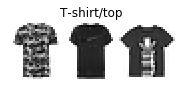

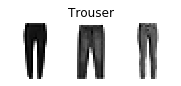

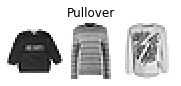

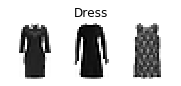

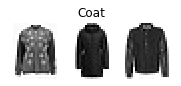

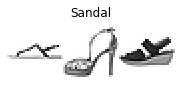

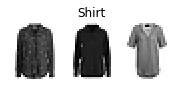

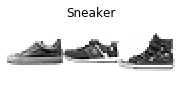

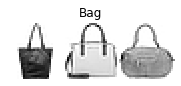

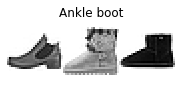

In [6]:
def plot_images(instances, images_per_row=10, **options): #class visualization
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

for i in range(10): #plotting 3 instances of each class in the training set.
    plt.figure(figsize=(3,3))
    plot_images(train[train["label"]==i].head(3).drop("label", axis=1).to_numpy(), images_per_row=3)
    plt.title(class_labels[i])
    plt.show()

### d) Average visualization:

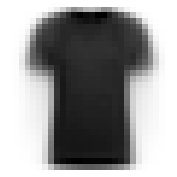

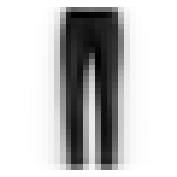

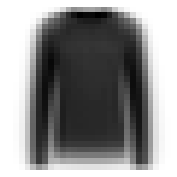

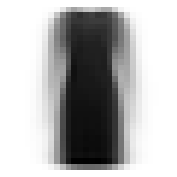

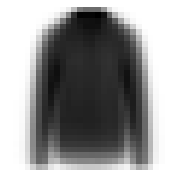

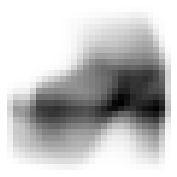

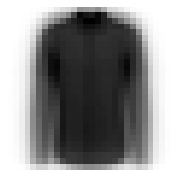

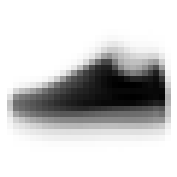

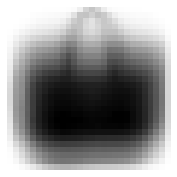

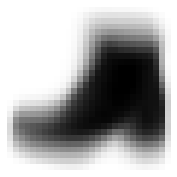

In [7]:
for i in range(10): #plot the average image for each class in the training set.
    plt.figure(figsize=(3,3))
    plot_image(train[train["label"]==i].drop("label", axis=1).mean().to_numpy())
    plt.show()

## BINARY CLASSIFICATION

### e) Binary transformation:

In [8]:
def binaryTransformation(df,r): #transforming class labels to binary (0 and 1).
    for j in range(len(r)):
        if r[j] in ['T-shirt/top', 'Pullover', 'Shirt', 'Trouser', 'Dress', 'Coat']:#If the item is a piece of clothing labelling it as 1
            df = df.replace(j,1)
        else:#If the item is a piece of non-clothing labelling it as 0
            df = df.replace(j,0)  
    return df

In [9]:
train_y_e =  binaryTransformation(train_y,class_labels) #transforming class labels to binary (0 and 1) for train_y

In [10]:
test_y_e = binaryTransformation(test_y,class_labels)  #transforming class labels to binary (0 and 1) for test_y

### f) Binary Classification Model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_1 = LogisticRegression() #Logistic Regression model
score = cross_val_score(log_1,train_x_a[:27000],train_y_e[:27000], cv=5, scoring = "accuracy") #performing 5-fold Cross Validation on the training data.
score.mean() #mean accuracy

0.9764814674414465

### g) Predict test data:

In [12]:
# train the model
# plot confusion matrix
# print(accuracy, precision, recall, f1_score)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

log_1.fit(train_x_a[:27000], train_y_e[:27000]) #training the model with train_x_a and train_y_e
pred_y = log_1.predict(test_x) #predicting the labels of test_x

print("Confusion matrix: " + '\n'+ str(confusion_matrix(test_y_e,pred_y))) #confusion matrix of predictions
print("Accuracy score: " + str(accuracy_score(test_y_e,pred_y)))
print("Precision score: " + str(precision_score(test_y_e,pred_y)))
print("Recall score: " + str(recall_score(test_y_e,pred_y)))
print("F1 score: " + str(f1_score(test_y_e,pred_y)))

Confusion matrix: 
[[1928   58]
 [  55 2960]]
Accuracy score: 0.9774045190961808
Precision score: 0.9807819748177601
Recall score: 0.9817578772802653
F1 score: 0.9812696834079231


### h) Model evaluation:


Text(0.5, 1.0, 'Precision-recall curve')

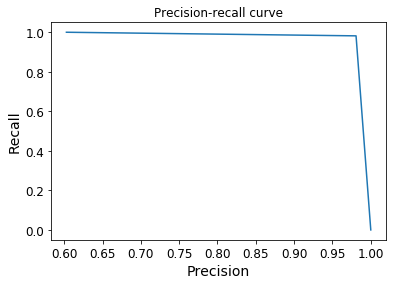

In [13]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(test_y_e,pred_y)

#plotting the model’s precision-recall curve
plt.plot(precisions, recalls, label = 'Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')

Text(0.5, 1.0, 'ROC Curve')

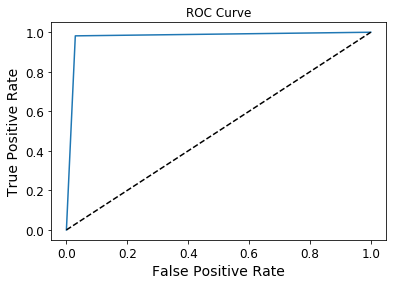

In [14]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y_e,pred_y)

#plotting the model’s ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [15]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y_e,pred_y) #ROC area under the curve (AUC) score

0.9762767231315727

### i) Learning curves:

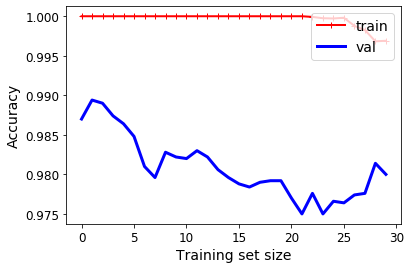

In [16]:
def plotting_learning_curves(model, train_x_a, train_y_e, test_x, test_y_e): #plotting the learning curve of a logistic regression model.
    train_errors, val_errors = [], []
    for m in range(1000, len(train_x_a), 1000):
        model.fit(train_x_a[:m], train_y_e[:m])
        y_train_predict = model.predict(train_x_a[:m])
        y_val_predict = model.predict(test_x)
        train_errors.append(accuracy_score(train_y_e[:m], y_train_predict))
        val_errors.append(accuracy_score(test_y_e, y_val_predict))

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("Accuracy", fontsize=14)             

log_2 = LogisticRegression()
plotting_learning_curves(log_2, train_x_a, train_y_e, test_x, test_y_e)                       
plt.show()                                      

## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

### j) Training and cross validating logistic regression:

In [17]:
# 3 fold Cross Validation on train_x_a and train_y
log_3 = LogisticRegression() #logistic regression model
score = cross_val_score(log_3,train_x_a[:4700],train_y[:4700], cv=3, scoring = "accuracy") #performing 3-fold cross validation
score.mean() #mean accuracy

0.76361412669146

### k) testing logistic regression:

In [18]:
# fit model 
# test model
# print confusion matrix
log_3.fit(train_x_a[:4700], train_y[:4700]) #fitting a logistic regression model on the training set (train_x_a, train_y)
predict_log = log_3.predict(test_x)
#calculating test accuracy by using test_x
test_accuracy = accuracy_score(test_y, predict_log)
#model's confusion matrix on the test set
confusion_matrix(test_y,predict_log)

array([[376,   2,  16,  29,   8,   1,  53,   2,  15,   0],
       [  4, 466,   4,  10,   3,   1,   3,   0,   0,   0],
       [ 19,   2, 335,   5,  70,   0,  55,   0,   4,   0],
       [ 30,   8,  13, 382,  28,   0,  42,   0,   4,   0],
       [  4,   4,  70,  25, 335,   0,  60,   0,   8,   0],
       [  4,   0,   8,   3,   8, 378,  10,  41,   9,  29],
       [ 83,   4,  63,  30,  72,   1, 252,   0,  14,   0],
       [  0,   0,   3,   0,   1,  22,   1, 415,   2,  27],
       [ 11,   1,  23,  11,  27,   7,  17,   5, 404,   2],
       [  3,   0,   1,   0,   1,  10,   4,  23,   1, 474]], dtype=int64)

## MULTICLASS CLASSIFICATION USING SVR

### l) Grid search to find best model:

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm_1 = SVC() #SVC model
param_grid = [{'kernel': ["linear", "rbf","poly"], 'C': [0.1, 0.5, 1, 5, 10],'tol':[0.0001, 0.001, 0.1],'decision_function_shape':['ovo','ovr']}]
grid_search = GridSearchCV(svm_1, param_grid, cv=5,scoring="accuracy",return_train_score=True)# using param_grid running GridSearchCV (cv = 5) with an SVC modelon the train_x_a and train_y.
grid_search.fit(train_x_a[:3000], train_y[:3000])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 1, 5, 10],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'kernel': ['linear', 'rbf', 'poly'],
                          'tol': [0.0001, 0.001, 0.1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [20]:
grid_search.best_score_ #best model’s accuracy

0.8103333333333333

In [21]:
grid_search.best_params_ #best model’s parameters

{'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'linear', 'tol': 0.0001}

### m)Testing the best model:

In [22]:
svm_2 = SVC(C=0.1, decision_function_shape= 'ovo', kernel= 'linear', tol=0.0001) #recreating the model using the best parameters in (l)
svm_2.fit(train_x_a[:10000], train_y[:10000])
y_pred = svm_2.predict(test_x)
#calculating its test accuracy
test_accuracy = accuracy_score(test_y, y_pred)
#model’s confusion matrix on the test set
print(test_accuracy)
confusion_matrix(test_y,y_pred)

0.8136372725454909


array([[400,   2,   9,  16,   2,   0,  65,   0,   7,   1],
       [  1, 479,   1,   8,   1,   0,   0,   0,   1,   0],
       [ 22,   1, 355,  10,  46,   0,  51,   0,   5,   0],
       [ 45,  13,   8, 408,  18,   0,  13,   0,   2,   0],
       [  5,   0, 100,  15, 340,   0,  45,   0,   1,   0],
       [  0,   0,   0,   0,   0, 440,   0,  30,   2,  18],
       [100,   1,  68,  24,  50,   0, 265,   0,  11,   0],
       [  0,   0,   0,   0,   0,  27,   0, 424,   0,  20],
       [  8,   0,   6,   2,   2,   5,   3,   5, 477,   0],
       [  0,   0,   0,   0,   0,  10,   0,  26,   0, 481]], dtype=int64)

## MULTICLASS CLASSIFICATION USING DECISION TREES

### n) Grid Search to find best model:

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree_1= DecisionTreeClassifier()
param_tree = [{'max_depth': [2, 4, 10], 'min_samples_split': [2, 3, 4]}]
#runing GridSearchCV (cv = 5) with a decision tree model on the train_x_a and train_y
grid_search_tree = GridSearchCV(tree_1, param_tree, cv=5,scoring="accuracy",return_train_score=True)
grid_search_tree.fit(train_x_a, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [2, 4, 10],
                          'min_samples_split': [2, 3, 4]}],
             pre_dispatch

In [24]:
grid_search_tree.best_score_ #best model’s accuracy

0.7958068064397853

In [25]:
grid_search_tree.best_params_ #best model’s parameters

{'max_depth': 10, 'min_samples_split': 3}

### o) Testing the best model:

In [26]:
# calculate test accuracy
# print confusion matrix
tree_2 = DecisionTreeClassifier(max_depth = 10, min_samples_split = 3) #recreating the model using the best parameters in (n)
tree_2.fit(train_x_a, train_y)
pred = tree_2.predict(test_x)
#calculating its test accuracy
test_accuracy = accuracy_score(test_y, pred)
print(test_accuracy)
#model’s confusion matrix on the test set
confusion_matrix(test_y,pred)

0.8006398720255948


array([[385,   1,   9,  37,   5,   1,  58,   0,   6,   0],
       [  6, 464,   2,  16,   1,   0,   2,   0,   0,   0],
       [  5,   2, 313,   3,  89,   0,  71,   2,   5,   0],
       [ 17,  12,   3, 413,  27,   3,  27,   1,   4,   0],
       [  2,   2,  35,  19, 384,   0,  60,   0,   4,   0],
       [  1,   0,   0,   4,   0, 430,   1,  29,   6,  19],
       [ 93,   2,  55,  20,  63,   0, 277,   0,   9,   0],
       [  1,   1,   1,   1,   0,  21,   1, 421,   1,  23],
       [  4,   3,   6,   4,   6,   4,  14,   6, 456,   5],
       [  0,   0,   0,   0,   1,  13,   0,  42,   0, 461]], dtype=int64)